In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/dataset15min/array_Xtrain_down_equals.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

449415

In [6]:
with open('dataset/generado/dataset15min/array_Ytrain_down_equals.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

449415

In [8]:
with open('dataset/generado/dataset15min/array_Xval_down_equals.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

58947

In [10]:
with open('dataset/generado/dataset15min/array_Yval_down_equals.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

58947

In [12]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

436590

In [14]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

436590

# Entrenamiento Vanilla LSTM con dropout

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/vanilla_dropout.h5')

Epoch 1/50
14045/14045 [==============================] - 293s 20ms/step - loss: 0.0021 - mae: 0.0321 - mse: 0.0021 - val_loss: 0.0012 - val_mae: 0.0235 - val_mse: 0.0012
Epoch 2/50
14045/14045 [==============================] - 389s 28ms/step - loss: 0.0015 - mae: 0.0276 - mse: 0.0015 - val_loss: 0.0013 - val_mae: 0.0247 - val_mse: 0.0013
Epoch 3/50
14045/14045 [==============================] - 246s 18ms/step - loss: 0.0015 - mae: 0.0268 - mse: 0.0015 - val_loss: 0.0011 - val_mae: 0.0225 - val_mse: 0.0011
Epoch 4/50
14045/14045 [==============================] - 239s 17ms/step - loss: 0.0014 - mae: 0.0264 - mse: 0.0014 - val_loss: 0.0011 - val_mae: 0.0222 - val_mse: 0.0011
Epoch 5/50
14045/14045 [==============================] - 233s 17ms/step - loss: 0.0014 - mae: 0.0260 - mse: 0.0014 - val_loss: 0.0010 - val_mae: 0.0214 - val_mse: 0.0010
Epoch 6/50
14045/14045 [==============================] - 198s 14ms/step - loss: 0.0014 - mae: 0.0259 - mse: 0.0014 - val_loss: 0.0015 - val_mae:

13644/13644 [==============================] - 74s 5ms/step - loss: 0.0017 - mae: 0.0292 - mse: 0.0017
test loss, test acc: [0.0017375629395246506, 0.029230911284685135, 0.0017375629395246506]


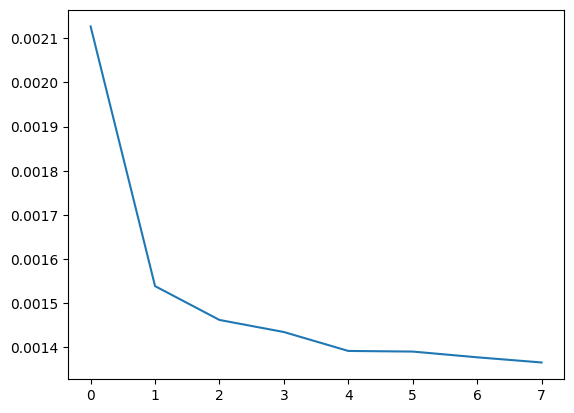

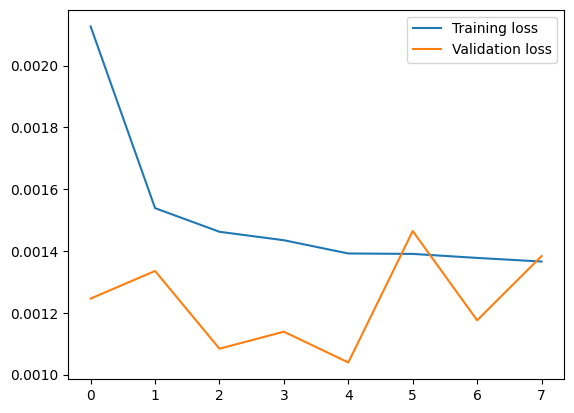

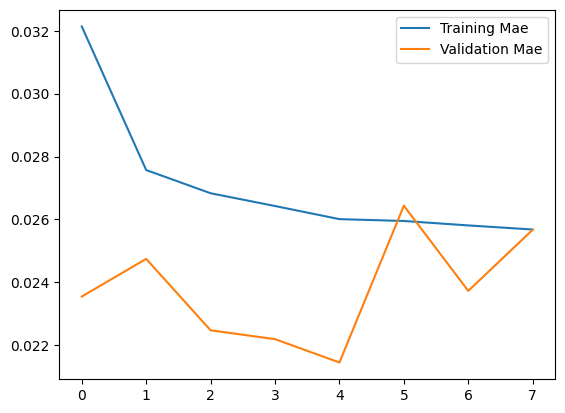

In [18]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 69s 5ms/step


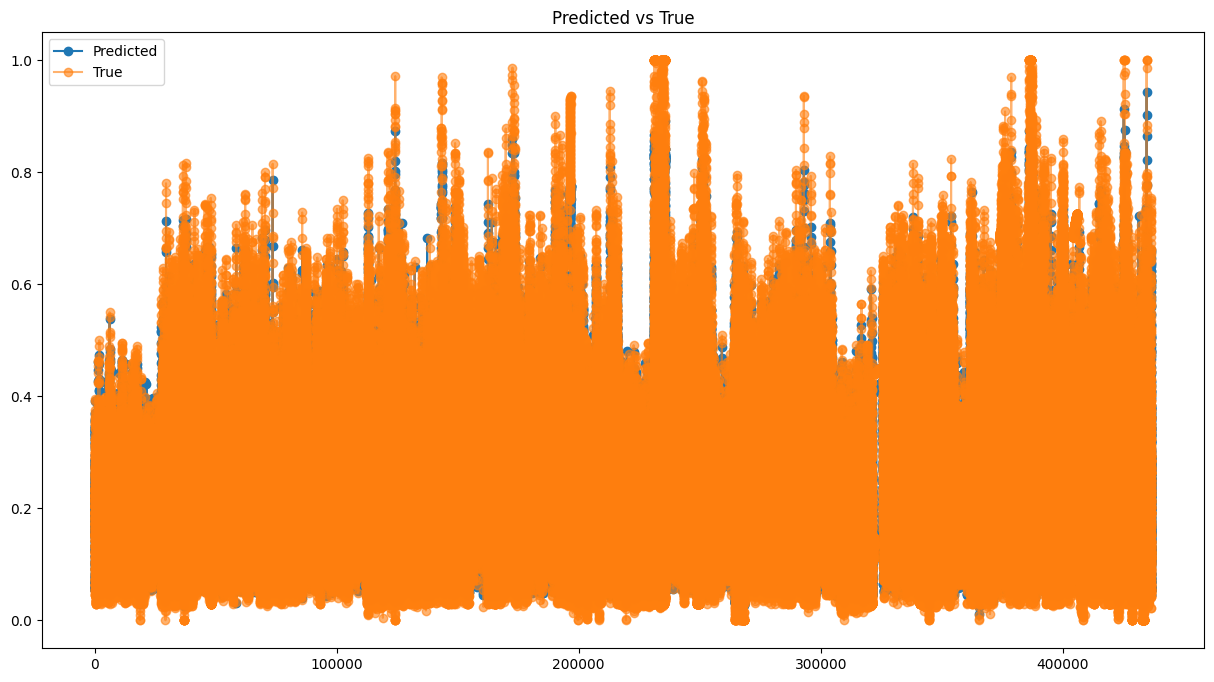

In [19]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [20]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.029230874533263937,
 'mse': 0.04168404528406171,
 'rmse': 0.0017375596312437071}

# Entrenamiento Vanilla LSTM sin dropout

In [21]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [22]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/vanilla_NO_dropout.h5')

Epoch 1/50
14045/14045 [==============================] - 195s 14ms/step - loss: 9.6446e-04 - mae: 0.0191 - mse: 9.6446e-04 - val_loss: 0.0011 - val_mae: 0.0232 - val_mse: 0.0011
Epoch 2/50
14045/14045 [==============================] - 205s 15ms/step - loss: 7.3437e-04 - mae: 0.0163 - mse: 7.3437e-04 - val_loss: 0.0012 - val_mae: 0.0232 - val_mse: 0.0012
Epoch 3/50
14045/14045 [==============================] - 198s 14ms/step - loss: 7.1705e-04 - mae: 0.0159 - mse: 7.1705e-04 - val_loss: 0.0011 - val_mae: 0.0231 - val_mse: 0.0011
Epoch 4/50
14045/14045 [==============================] - 212s 15ms/step - loss: 7.0509e-04 - mae: 0.0157 - mse: 7.0509e-04 - val_loss: 0.0011 - val_mae: 0.0227 - val_mse: 0.0011


13644/13644 [==============================] - 85s 6ms/step - loss: 0.0017 - mae: 0.0294 - mse: 0.0017
test loss, test acc: [0.0016594218323007226, 0.02935655042529106, 0.0016594218323007226]


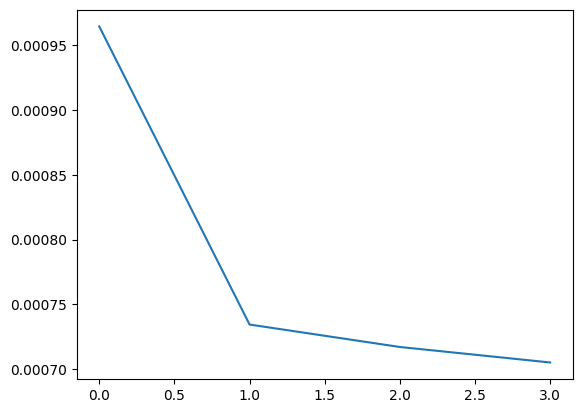

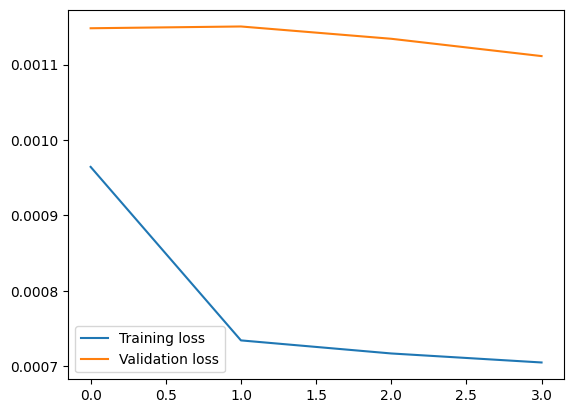

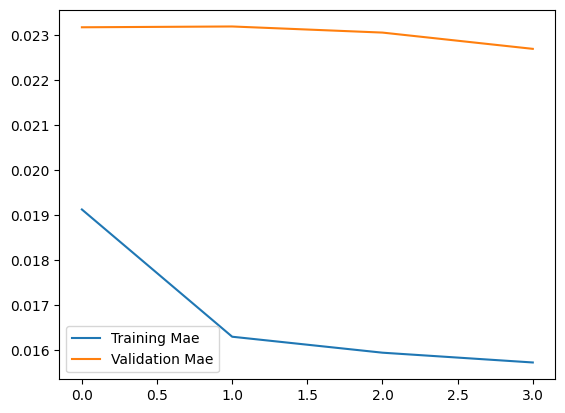

In [23]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 69s 5ms/step


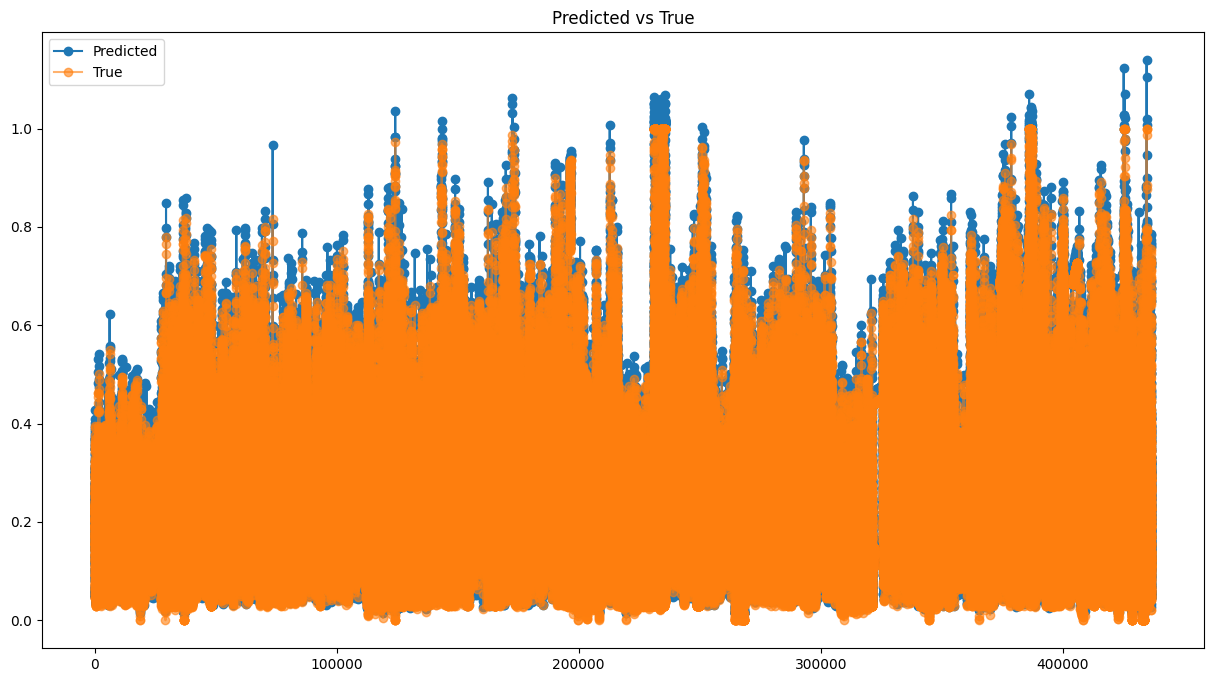

In [24]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [25]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.029356438124404936,
 'mse': 0.04073604070726855,
 'rmse': 0.0016594250125042404}

# Entrenamiento Stacked LSTM con dropout

In [26]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [27]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/stacked_dropout.h5')

Epoch 1/50
14045/14045 [==============================] - 369s 26ms/step - loss: 0.0021 - mae: 0.0318 - mse: 0.0021 - val_loss: 0.0015 - val_mae: 0.0289 - val_mse: 0.0015
Epoch 2/50
14045/14045 [==============================] - 365s 26ms/step - loss: 0.0015 - mae: 0.0272 - mse: 0.0015 - val_loss: 0.0016 - val_mae: 0.0322 - val_mse: 0.0016
Epoch 3/50
14045/14045 [==============================] - 361s 26ms/step - loss: 0.0014 - mae: 0.0262 - mse: 0.0014 - val_loss: 0.0022 - val_mae: 0.0383 - val_mse: 0.0022
Epoch 4/50
14045/14045 [==============================] - 390s 28ms/step - loss: 0.0014 - mae: 0.0256 - mse: 0.0014 - val_loss: 0.0017 - val_mae: 0.0334 - val_mse: 0.0017


13644/13644 [==============================] - 127s 9ms/step - loss: 0.0017 - mae: 0.0306 - mse: 0.0017
test loss, test acc: [0.0016831191023811698, 0.030643051490187645, 0.0016831191023811698]


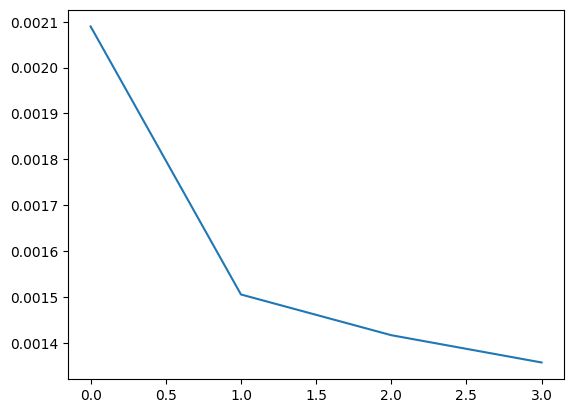

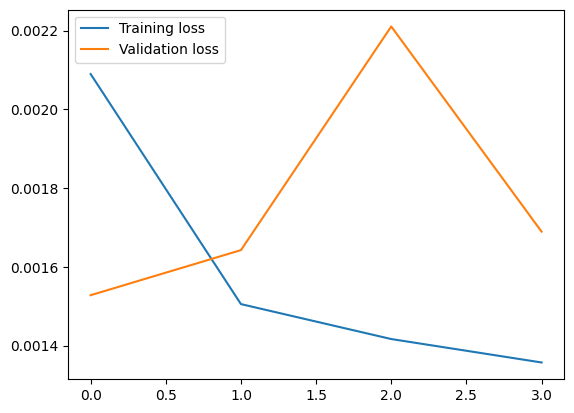

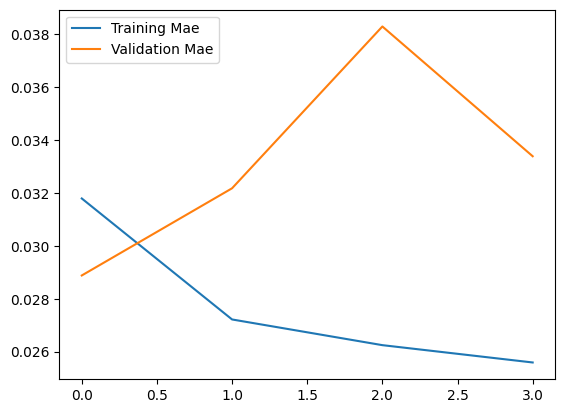

In [28]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 116s 8ms/step


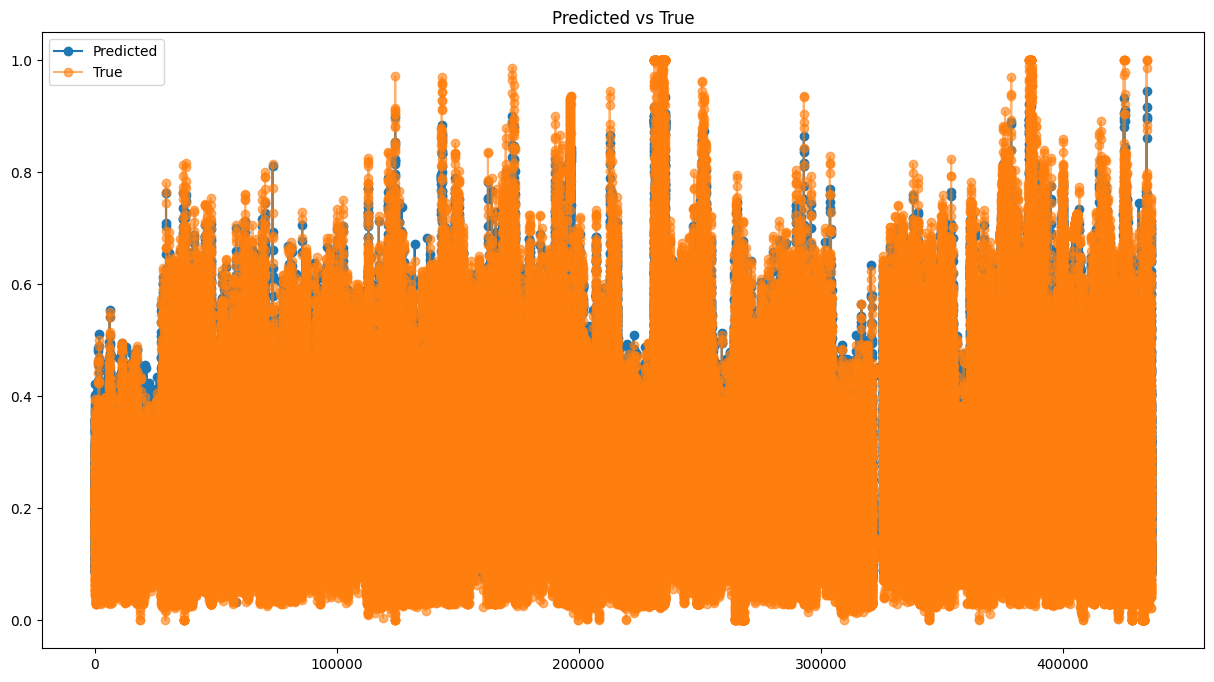

In [29]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [30]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.030643035605962977,
 'mse': 0.04102582187194058,
 'rmse': 0.0016831180602681981}

# Entrenamiento Stacked LSTM sin dropout

In [31]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [32]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/stacked_NO_dropout.h5')

Epoch 1/50
14045/14045 [==============================] - 339s 24ms/step - loss: 0.0011 - mae: 0.0205 - mse: 0.0011 - val_loss: 9.9994e-04 - val_mae: 0.0202 - val_mse: 9.9994e-04
Epoch 2/50
14045/14045 [==============================] - 336s 24ms/step - loss: 7.4410e-04 - mae: 0.0165 - mse: 7.4410e-04 - val_loss: 0.0011 - val_mae: 0.0227 - val_mse: 0.0011
Epoch 3/50
14045/14045 [==============================] - 327s 23ms/step - loss: 7.2141e-04 - mae: 0.0161 - mse: 7.2141e-04 - val_loss: 0.0011 - val_mae: 0.0220 - val_mse: 0.0011
Epoch 4/50
14045/14045 [==============================] - 302s 21ms/step - loss: 7.0955e-04 - mae: 0.0159 - mse: 7.0955e-04 - val_loss: 0.0011 - val_mae: 0.0221 - val_mse: 0.0011


13644/13644 [==============================] - 103s 8ms/step - loss: 0.0016 - mae: 0.0288 - mse: 0.0016
test loss, test acc: [0.001635119435377419, 0.0287962444126606, 0.001635119435377419]


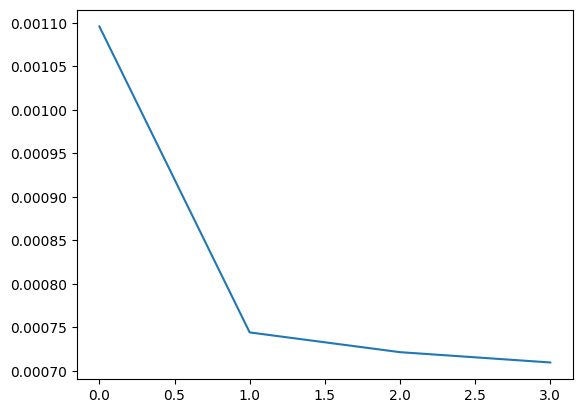

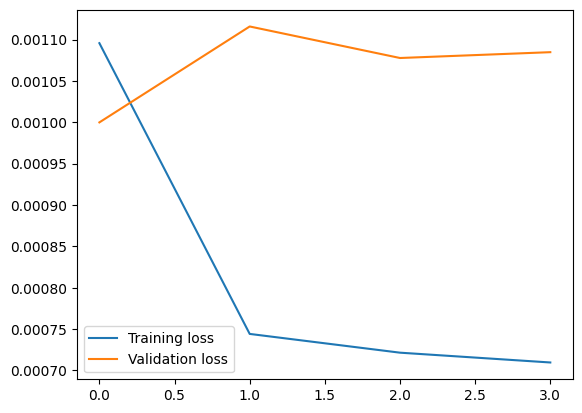

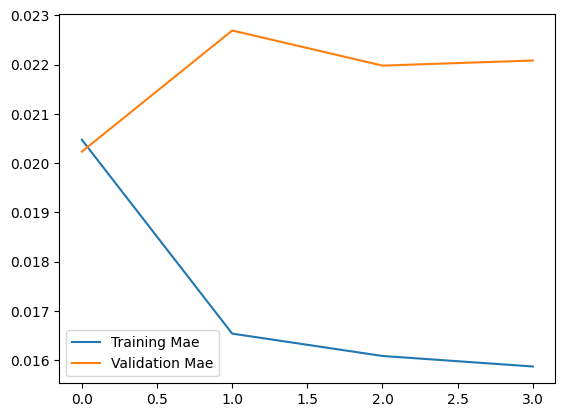

In [33]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 101s 7ms/step


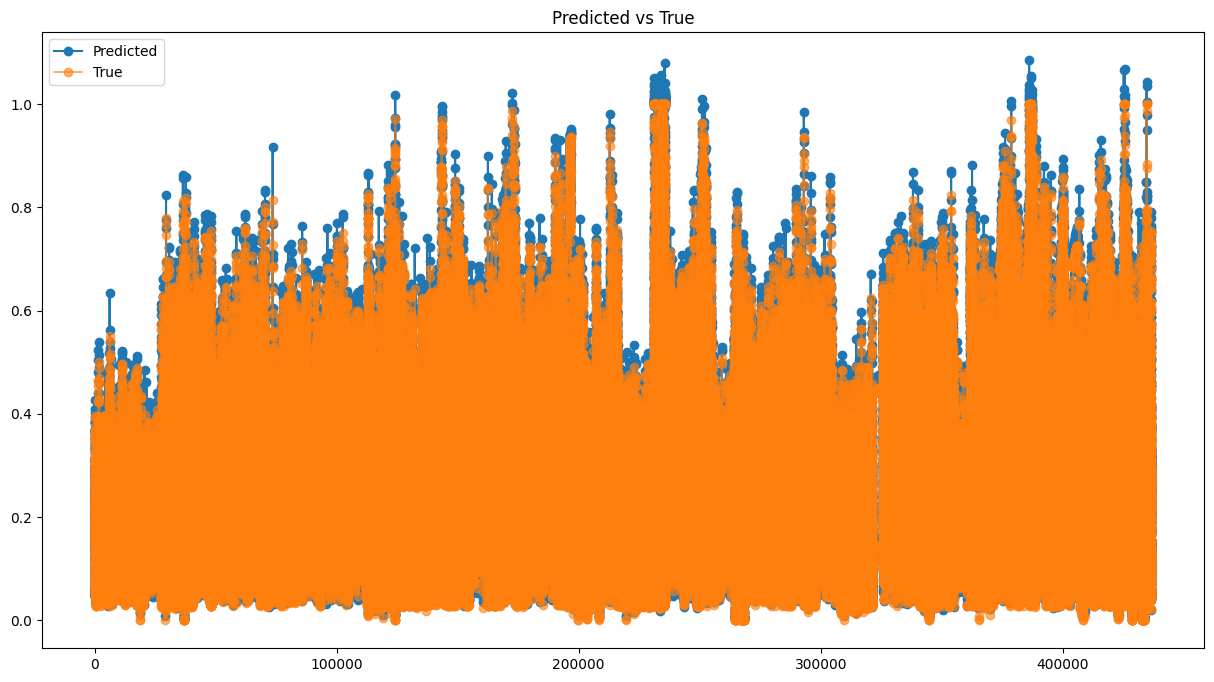

In [34]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [35]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.028796296388752952,
 'mse': 0.04043663527531249,
 'rmse': 0.0016351214723886462}

# Entrenamiento Bidirectional LSTM con dropout

In [36]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [37]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/bidirectional_dropout.h5')

Epoch 1/50
14045/14045 [==============================] - 204s 14ms/step - loss: 0.0022 - mae: 0.0328 - mse: 0.0022 - val_loss: 0.0016 - val_mae: 0.0277 - val_mse: 0.0016
Epoch 2/50
14045/14045 [==============================] - 211s 15ms/step - loss: 0.0016 - mae: 0.0280 - mse: 0.0016 - val_loss: 0.0014 - val_mae: 0.0249 - val_mse: 0.0014
Epoch 3/50
14045/14045 [==============================] - 202s 14ms/step - loss: 0.0015 - mae: 0.0270 - mse: 0.0015 - val_loss: 0.0012 - val_mae: 0.0243 - val_mse: 0.0012
Epoch 4/50
14045/14045 [==============================] - 209s 15ms/step - loss: 0.0014 - mae: 0.0264 - mse: 0.0014 - val_loss: 0.0013 - val_mae: 0.0241 - val_mse: 0.0013
Epoch 5/50
14045/14045 [==============================] - 207s 15ms/step - loss: 0.0014 - mae: 0.0262 - mse: 0.0014 - val_loss: 0.0011 - val_mae: 0.0221 - val_mse: 0.0011
Epoch 6/50
14045/14045 [==============================] - 207s 15ms/step - loss: 0.0014 - mae: 0.0259 - mse: 0.0014 - val_loss: 0.0011 - val_mae:

13644/13644 [==============================] - 68s 5ms/step - loss: 0.0017 - mae: 0.0284 - mse: 0.0017
test loss, test acc: [0.0016710234340280294, 0.02839799039065838, 0.0016710234340280294]


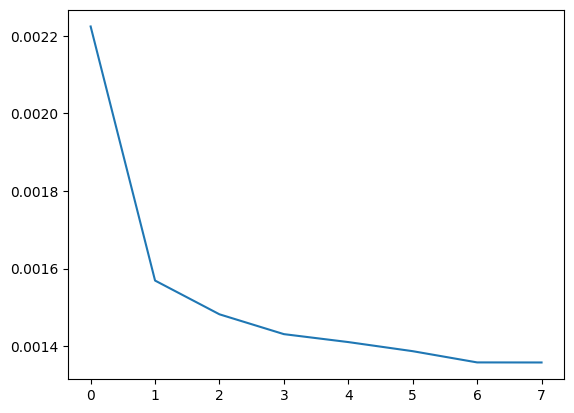

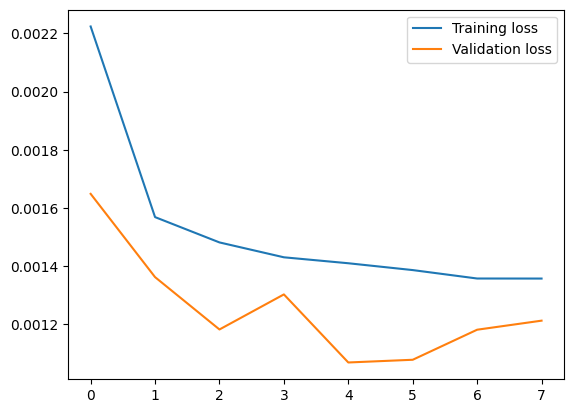

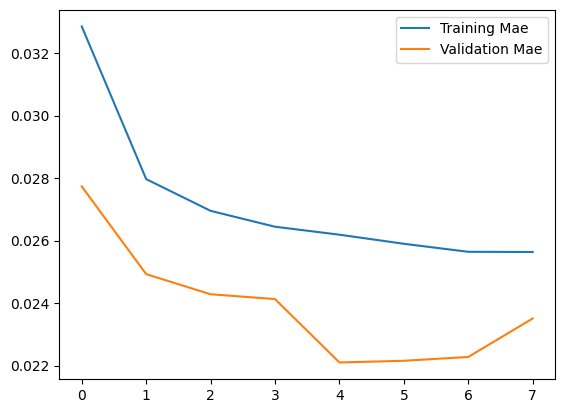

In [38]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 67s 5ms/step


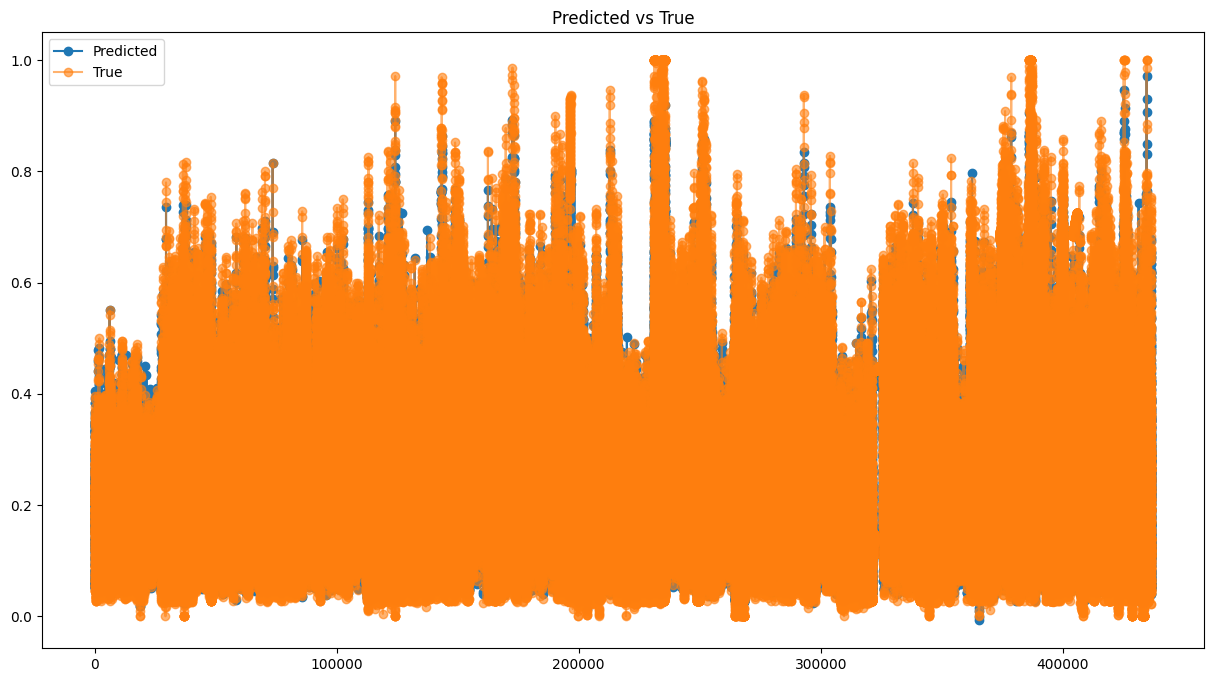

In [39]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [40]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.028398001267668952,
 'mse': 0.040878217742453565,
 'rmse': 0.0016710286857994456}

# Entrenamiento Bidirectional LSTM sin dropout

In [41]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/bidirectional_NO_dropout.h5')

Epoch 1/50
14045/14045 [==============================] - 201s 14ms/step - loss: 0.0010 - mae: 0.0196 - mse: 0.0010 - val_loss: 0.0010 - val_mae: 0.0210 - val_mse: 0.0010
Epoch 2/50
14045/14045 [==============================] - 201s 14ms/step - loss: 7.2696e-04 - mae: 0.0162 - mse: 7.2696e-04 - val_loss: 0.0011 - val_mae: 0.0225 - val_mse: 0.0011
Epoch 3/50
14045/14045 [==============================] - 203s 14ms/step - loss: 7.1310e-04 - mae: 0.0159 - mse: 7.1310e-04 - val_loss: 0.0011 - val_mae: 0.0225 - val_mse: 0.0011
Epoch 4/50
14045/14045 [==============================] - 201s 14ms/step - loss: 7.0082e-04 - mae: 0.0156 - mse: 7.0082e-04 - val_loss: 0.0011 - val_mae: 0.0221 - val_mse: 0.0011


13644/13644 [==============================] - 69s 5ms/step - loss: 0.0016 - mae: 0.0289 - mse: 0.0016
test loss, test acc: [0.0016345035983249545, 0.028944537043571472, 0.0016345035983249545]


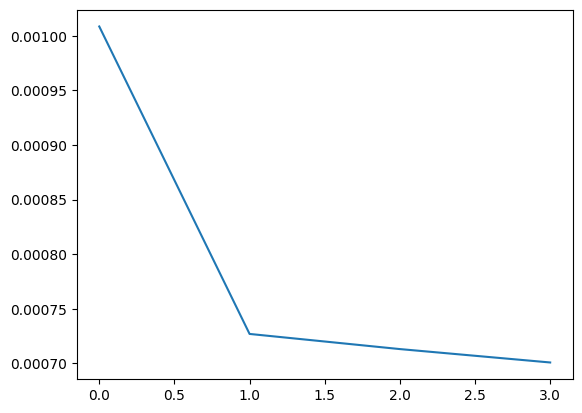

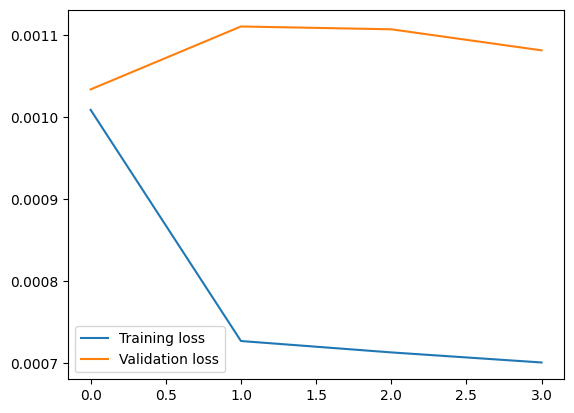

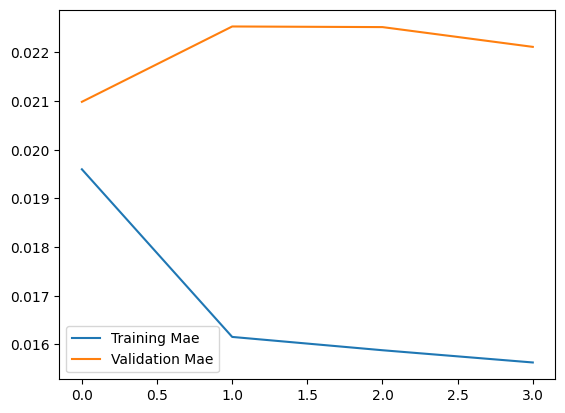

In [43]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 67s 5ms/step


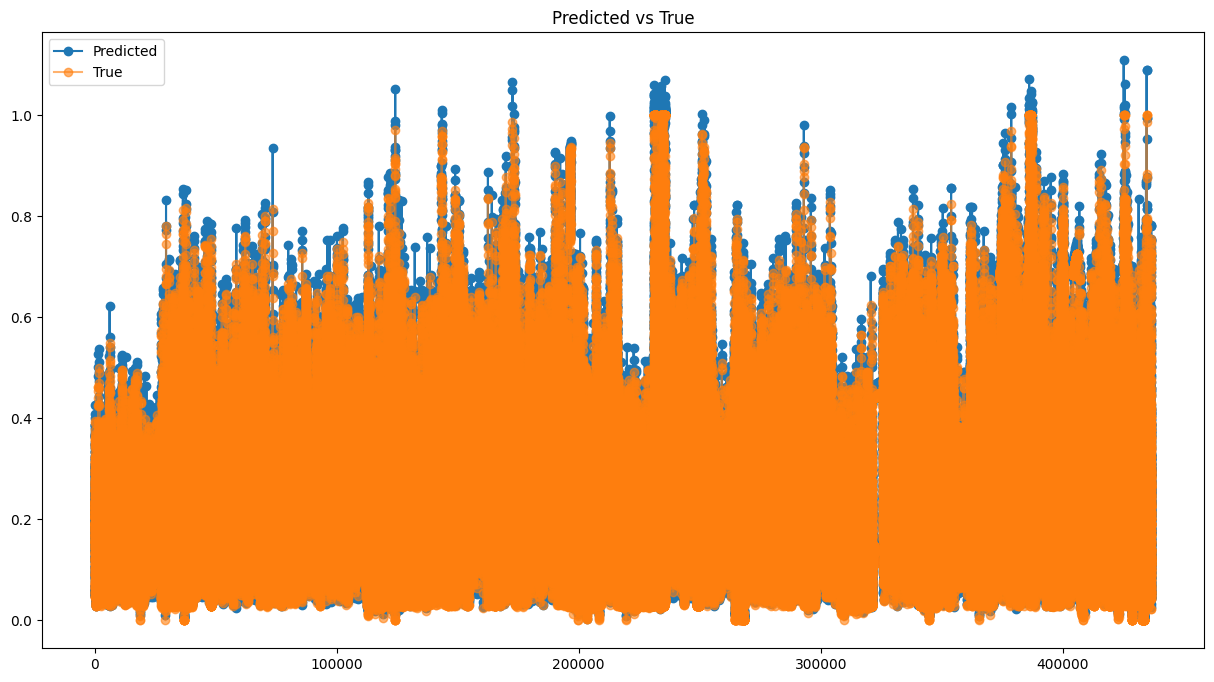

In [44]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [45]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.02894447736897411,
 'mse': 0.0404289357272191,
 'rmse': 0.0016344988440356127}